# Implementing Simple Linear Regression ( Gradient Descent[vectorized] )

In [48]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# creating x data

slope = 3
intercept = 10

x = 5*np.random.rand(100,1)
y = intercept + slope*x +np.random.randn(100,1)

In [50]:
theta = np.random.randint(-10,10,(1,2))

In [51]:
x_gd = np.hstack([np.ones((len(x),1)),x])

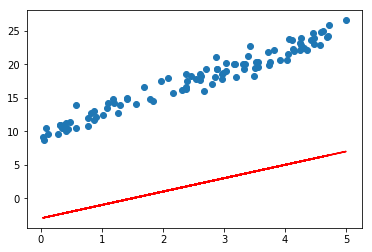

In [52]:
y_pred = np.dot(x_gd,theta.T)

plt.scatter(x,y)
plt.plot(x,y_pred,'-r')

#### 1. Implementing Gradient Descent 

Cost $$
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
$$

Gradient

$$
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
$$
Gradients $$
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
$$$$
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
$$$$
\theta_2: = \theta_2-\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
$$

$$
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)})
$$

In [53]:
def compute_error(x_gd,y,theta):
    y_hat = np.dot(x_gd,theta.T)
    return sum((y-y_hat)**2 )/(len(y)*2)

In [54]:
def gradient_descent(x_gd,y,theta,learning_rate=0.0001,iterations = 10000):
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    precision = 0.01
    
    for it in range(iterations):
        y_hat = np.dot(x_gd,theta.T)
        
        error = compute_error(x_gd,y,theta)
        
        theta = theta-((1/len(y))*learning_rate*(np.dot(x_gd.T,(y_hat-y)))).T
        
        theta_history[it,:] = theta
        cost_history[it] = error
    
    return theta,cost_history,theta_history
                                                    
        
        

In [55]:
# calculating theta and cost_history and theta_history

theta_gd,cost_history,theta_history = \
    gradient_descent(x_gd,y,theta,learning_rate=0.0001,iterations = 100000)

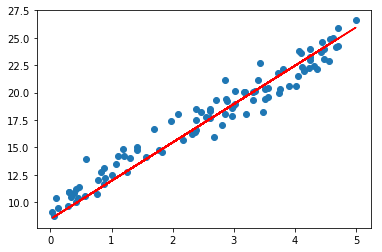

In [56]:
y_pred = np.dot(x_gd,theta_gd.T)

plt.scatter(x,y)
plt.plot(x,y_pred,'-r')

In [57]:
cost_history

array([123.26386327, 123.05993729, 122.85639645, ...,   0.67027632,
         0.67026811,   0.6702599 ])

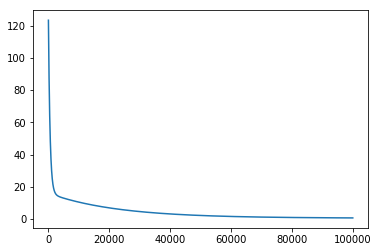

In [59]:
# plotting cost funciton and iterations

plt.plot(range(100000),cost_history)

In [46]:
def gradientDescentVisualization(x_gd,y,theta,learning_rate=0.001,iterations=1000):
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    
    precision =0.001
    
    plt.scatter(x_gd[:,1],y)
                             
    for it in range(iterations):
        
        y_hat = np.dot(x_gd,theta.T)
        
        plt.plot(x_gd[:,1],y_hat,'r.')
        
        theta = theta-((1/len(y))*(learning_rate)*(np.dot(x_gd.T,(y_hat-y)))).T
        
        cost_history[it] = compute_error(x_gd,y,theta)
    
    return  theta,cost_history
     
                             
                        

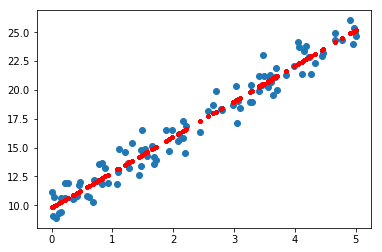

In [47]:
gradientDescentVisualization(x_gd,y,theta,learning_rate=0.0001,iterations = 1000)

In [72]:
# implementing stochastic gradient descent

def sgd(x_gd,y,theta,learning_rate=0.0001,iterations = 100000):
    
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        for i in range(1,len(y)):
            indx = np.random.randint(0,i)
            x_i = x_gd[indx,:].reshape(1,2)
            y_i = y[indx].reshape(1,1)
            
            y_pred = np.dot(x_i,theta.T)
            
            theta = theta-((1/len(y))*(learning_rate)*(np.dot(x_i.T,y_pred-y_i))).T
            
            cost+= compute_error(x_i,y_i,theta)
         
        cost_history[it]=cost
    
    return theta,cost_history
            

In [73]:
theta

array([[-3,  2]])

In [74]:
theta_gd

array([[8.47371475, 3.49386499]])

In [77]:
theta_sgd,cost_history = \
    sgd(x_gd,y,theta,learning_rate=0.0001,iterations = 10000)

In [78]:
theta_sgd

array([[0.36604805, 5.86545343]])

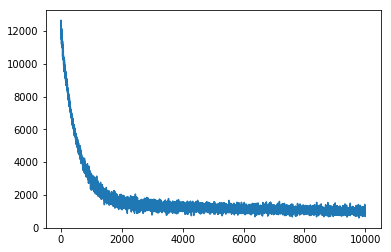

In [80]:
# plot of SGD cost function history

plt.plot(range(10000),cost_history)

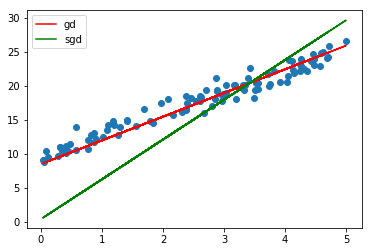

In [84]:
# plotting of lines from sgd and gd

plt.scatter(x_gd[:,1],y)
plt.plot(x_gd[:,1],np.dot(x_gd,theta_gd.T),'-r',label = 'gd')
plt.plot(x_gd[:,1],np.dot(x_gd,theta_sgd.T),'-g',label = 'sgd')
plt.legend()
